## Prospective Milestone Project - Abalone 
### Author - Joe Duprey



<font color='red'> **MILESTONE 3 BEGINS AFTER DISTRIBUTION ANALYSIS** </font> 

---
Use professional coding standards and techniques including:

   - explanatory markdown text
   - proper code comments
   - functions to minimize redundant code
   - minimize hard-coded variables

## Problem:
Abalone age can be determined using a microscope to count rings of growth in their shell and adding 1.5 to this value (see UCI Abalone metadata). This process is time/labor intensive.
## Solution:
Determine what physical attributes or combination of physical attributes can be used to best predict abalone age. The abalone dataset includes the following quantitative attributes to investigate: Length, Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight. These attributes are more easily measured than shell growth rings. Dataset also includes the catagorical attribute Sex - M:male, F:female, I:infant.
## Data Source:
UCS Machine Learning Archive - Abalone dataset 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Load dataset
def load_dataset(url, col_names):
    abalone = pd.read_csv(url, header=None, names=col_names)
    return abalone

url = 'https://raw.githubusercontent.com/jdduprey/data400/master/abalone.data'
abalone_cols = ['Sex','Length','Diameter','Height','Whole_weight','Shuck_weight','Vis_weight','Shell_weight','Rings']
abalone = load_dataset(url, abalone_cols)

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Summary Statistics
The following lines of code seperate the abalone data into sex specific data for males, females and infants. Some notable takeaways are:
- Almost 200 more males were measured than females
- Grown males and females have similar quantitative attributes. Female mean whole weight is about 1.05g and about .05g greater than mean male whole weight. 
- Mean infant age is about 9.3, mean female age 12.6, mean male age 12.2 (so young might be a more appropriate discription than infant)

In [4]:
male_df = abalone[abalone['Sex'] == 'M']
female_df = abalone[abalone['Sex'] == 'F']
infant_df = abalone[abalone['Sex'] == 'I']

round(male_df.describe(), 3)

,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings
count,1528.000,1528.000,1528.000,1528.000,1528.000,1528.000,1528.000,1528.000
mean,0.561,0.439,0.151,0.991,0.433,0.216,0.282,10.705
std,0.103,0.084,0.035,0.471,0.223,0.105,0.131,3.026
min,0.155,0.110,0.025,0.016,0.006,0.003,0.005,3.000
25%,0.505,0.395,0.130,0.672,0.276,0.146,0.190,9.000
50%,0.580,0.455,0.155,0.976,0.422,0.210,0.276,10.000
75%,0.630,0.500,0.175,1.266,0.566,0.278,0.356,12.000
max,0.780,0.630,0.515,2.826,1.351,0.760,0.897,27.000


In [5]:
round(female_df.describe(), 3)

,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings
count,1307.000,1307.000,1307.000,1307.000,1307.000,1307.000,1307.000,1307.000
mean,0.579,0.455,0.158,1.047,0.446,0.231,0.302,11.129
std,0.086,0.071,0.040,0.430,0.199,0.098,0.126,3.104
min,0.275,0.195,0.015,0.080,0.031,0.021,0.025,5.000
25%,0.525,0.410,0.140,0.730,0.295,0.159,0.213,9.000
50%,0.590,0.465,0.160,1.038,0.440,0.224,0.295,10.000
75%,0.640,0.505,0.175,1.320,0.573,0.297,0.375,12.000
max,0.815,0.650,1.130,2.657,1.488,0.590,1.005,29.000


In [6]:
round(infant_df.describe(), 3)

,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings
count,1342.000,1342.000,1342.000,1342.000,1342.000,1342.000,1342.000,1342.000
mean,0.428,0.326,0.108,0.431,0.191,0.092,0.128,7.890
std,0.109,0.088,0.032,0.286,0.128,0.063,0.085,2.512
min,0.075,0.055,0.000,0.002,0.001,0.000,0.002,1.000
25%,0.360,0.270,0.085,0.206,0.090,0.042,0.064,6.000
50%,0.435,0.335,0.110,0.384,0.170,0.080,0.113,8.000
75%,0.510,0.390,0.130,0.599,0.270,0.130,0.178,9.000
max,0.725,0.550,0.220,2.050,0.774,0.440,0.655,21.000


## Facet Grid Data Exploration
- Overplotting complicated scatterplot visualization of this data. The first grid gives some insights but appears overplotted even with alpha = 0.2, I created a 2nd facet grid with about 75% of the data removed at random but perception is still not great.
- At first glance height has a different relationship with rings when compared to the other physical measurements
- Distribution of heights appears more narrow as the abalone age
- Shell weight distribution appears to widen as the abalone age
- The facet grid makes it appear that M and F abalone data is similarly distributed across all attributes, infant data appears to differ somewhat, but this could just be a consequence of the different age range
- Most of the abalone sampled were between about 5 rings and 20 rings or 6.5 years and 21.5 years

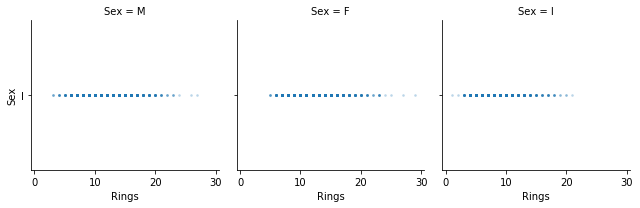

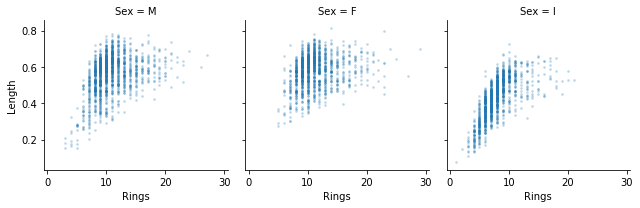

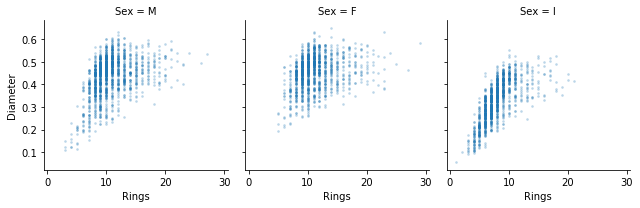

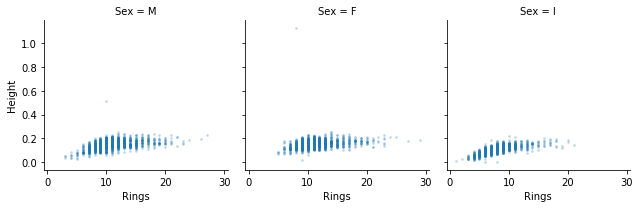

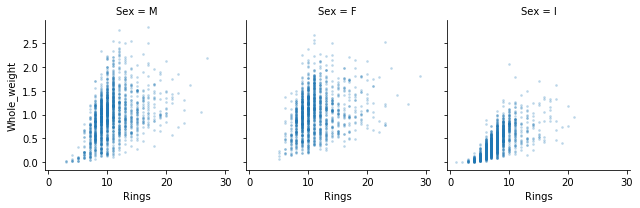

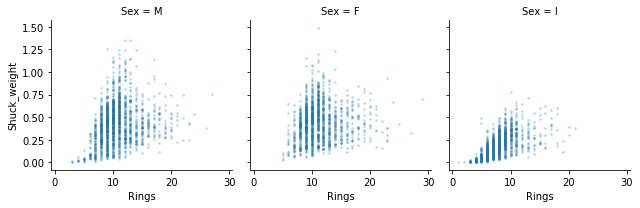

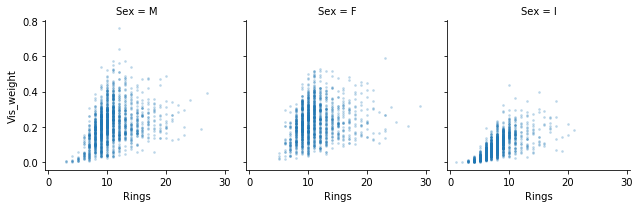

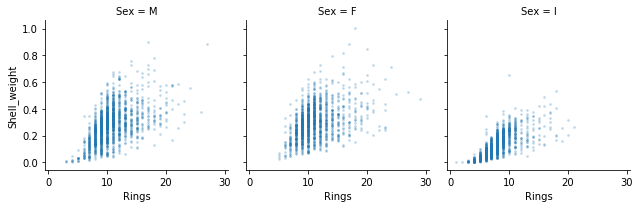

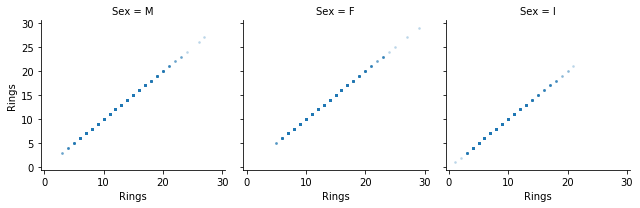

In [7]:
# create a facet grid with the abalone dataset to visualize how different physical attributes correlate with rings 
def facet_by_col(df):
    for col in df.columns:
        ax = sns.FacetGrid(df, col='Sex', 
                          palette="Set2", margin_titles=True)
        ax.map(sns.regplot,'Rings', col, fit_reg = False, scatter_kws = {'alpha':0.2,'s':3})
    return ax
facet_by_col(abalone)

In [8]:
abalone.shape

(4177, 9)

In [9]:
# take a subset of the original df 
def subset_data(remove_n=3000, df=abalone):
    drop_indices = np.random.choice(df.index, remove_n, replace=False)
    df_subset = df.drop(drop_indices)
    return df_subset
abalone_subset = subset_data()

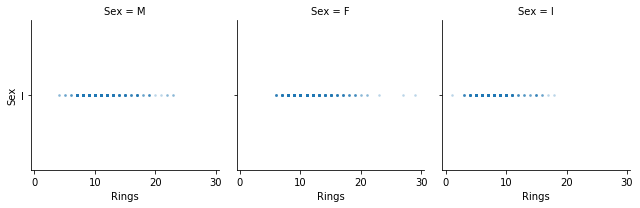

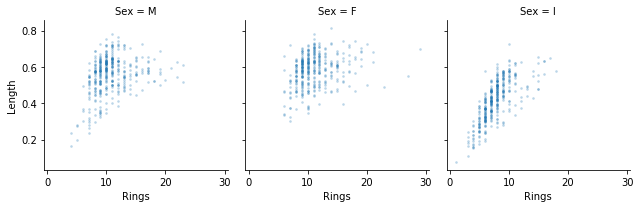

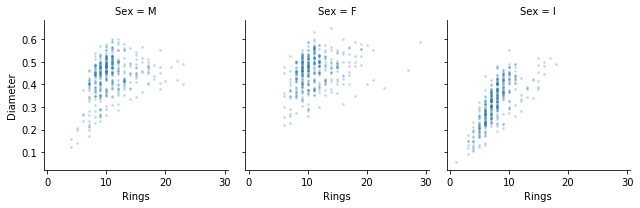

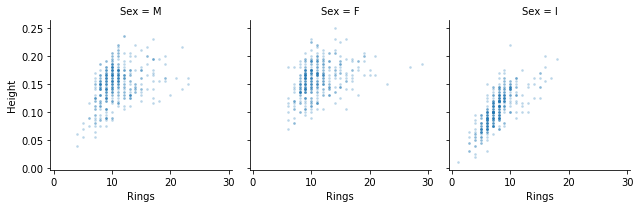

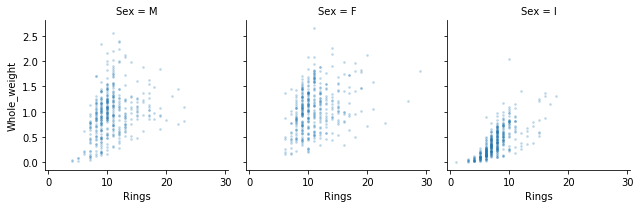

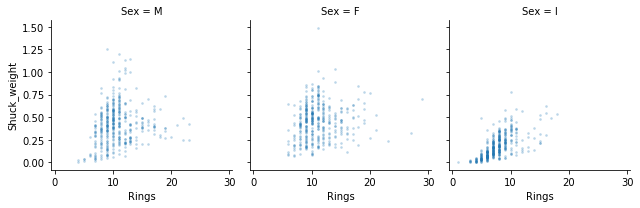

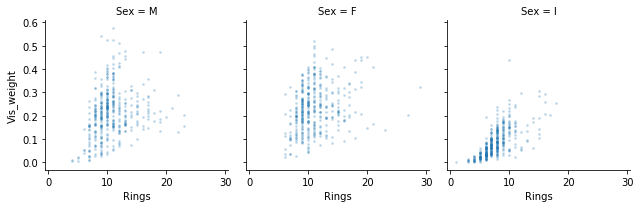

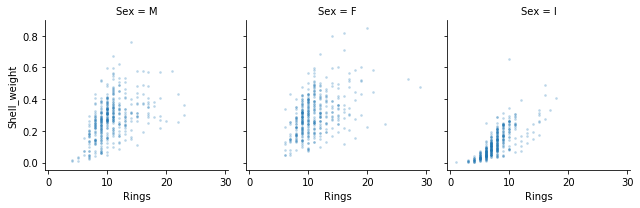

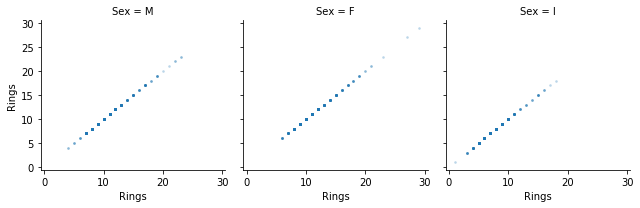

In [10]:
# facet grid of subset df
facet_by_col(abalone_subset)

## Distribution Plot Data Exploration
- Length and Diameter distibutions are negatively skewed.
- Height has a much narrower distribution than other attributes - which makes sense considering bivalve shell shape (clam shells for example).
- All types of weight measurement are positively skewed
- Rings(age indicator) is also positivey skewed

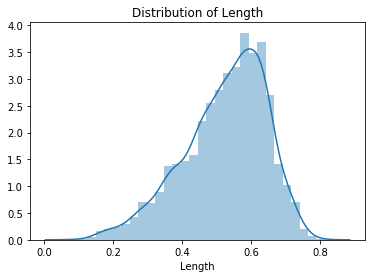

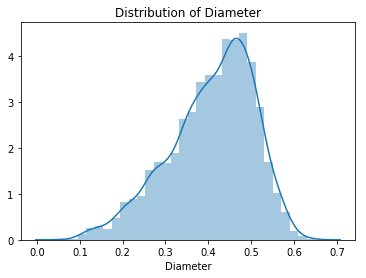

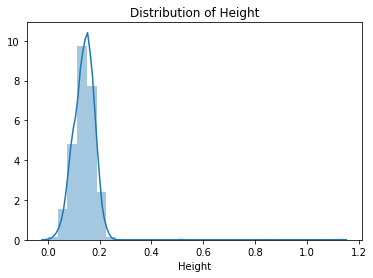

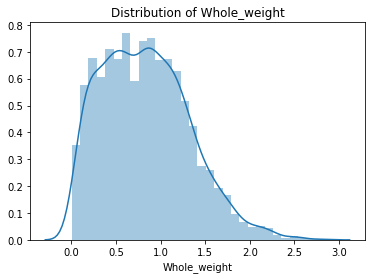

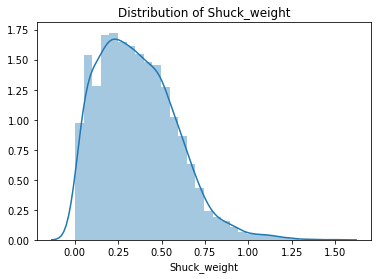

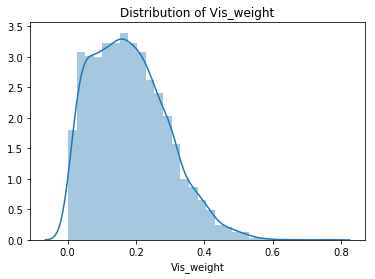

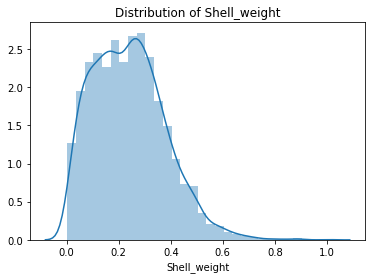

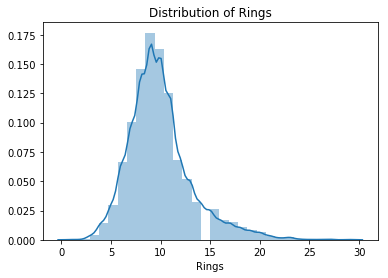

<Figure size 432x288 with 0 Axes>

In [11]:
# create distribution plots for all attributes except for sex
def dist_plot(col):
    ax = sns.distplot(a=col, bins=30)
    ax.set(title ='Distribution of {}'.format(col.name))
    plt.figure()

col_list = [abalone.Length, abalone.Diameter, abalone.Height, abalone.Whole_weight, abalone.Shuck_weight, abalone.Vis_weight, abalone.Shell_weight, abalone.Rings]

# iterate through attributes
for col in col_list:
    dist_plot(col)


## Scatter Plot Data Exploration
- Overplotting continues to complicate things however scatter reveal:
- Relationships between weight and exterior shell measurements is exponential
- Relationships between weight measurements of different body parts is approximately linear

Text(0.5, 1.0, 'Viscera Weight vs Length in Tasmanian Abalone')

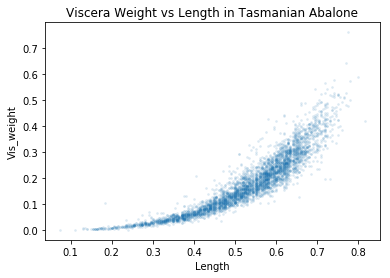

In [12]:
ax = sns.regplot('Length','Vis_weight', abalone, fit_reg=False, scatter_kws = {'alpha':0.1,'s':3})
ax.set_title('Viscera Weight vs Length in Tasmanian Abalone') 

Text(0.5, 1.0, 'Viscera Weight vs Diameter in Tasmanian Abalone')

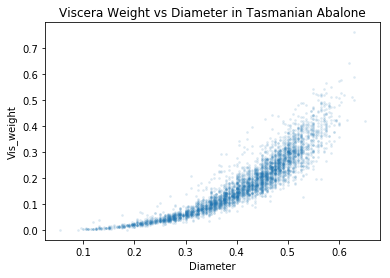

In [13]:
ax = sns.regplot('Diameter','Vis_weight', abalone, fit_reg=False, scatter_kws = {'alpha':0.1,'s':3})
ax.set_title('Viscera Weight vs Diameter in Tasmanian Abalone') 

Text(0.5, 1.0, 'Viscera Weight vs Height in Tasmanian Abalone')

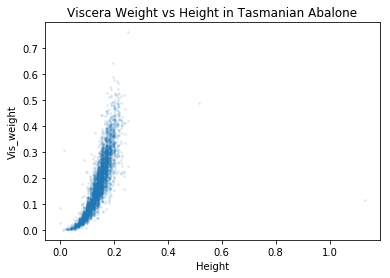

In [14]:
ax = sns.regplot('Height','Vis_weight', abalone, fit_reg=False, scatter_kws = {'alpha':0.1,'s':3})
ax.set_title('Viscera Weight vs Height in Tasmanian Abalone') 

Text(0.5, 1.0, 'Viscera Weight vs Shell Weight in Tasmanian Abalone')

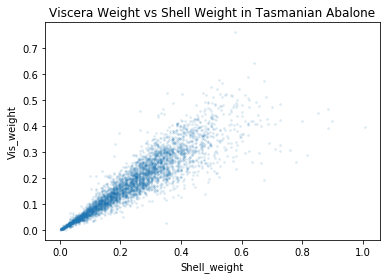

In [15]:
ax = sns.regplot('Shell_weight','Vis_weight', abalone, fit_reg=False, scatter_kws = {'alpha':0.1,'s':3})
ax.set_title('Viscera Weight vs Shell Weight in Tasmanian Abalone') 

In [16]:
# split abalone df into infant and adult slices
infant_slice = abalone[abalone['Sex'] == 'I'] 
adult_slice = abalone[abalone['Sex'] != 'I']

## Comparative KDE plot Data Exploration
- Attribute distributions are different for between age catagories of abalone (adult vs infant)
- Height is by far the narrowist distribution for both catagories
- Strangley, there are some abalone that the original biologists classified as "infant" that are older than some abalone classified as "adult"

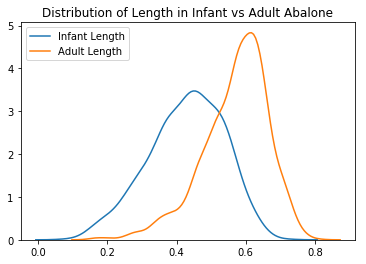

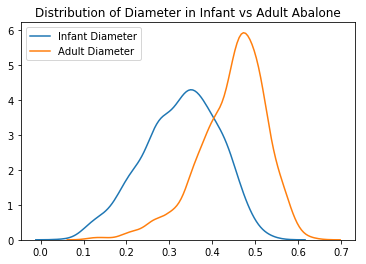

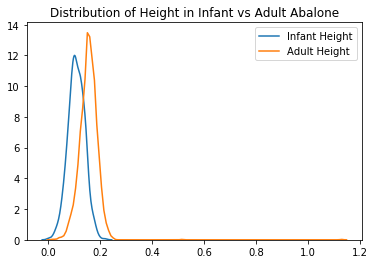

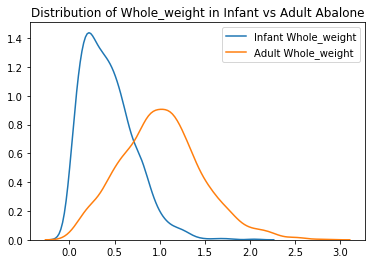

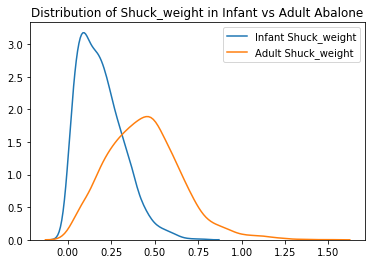

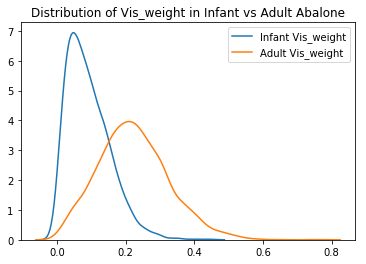

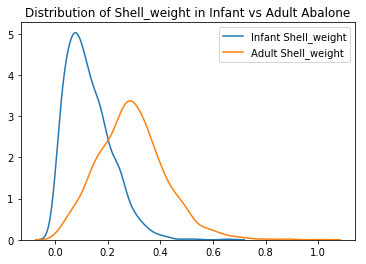

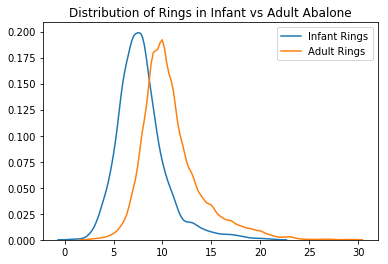

<Figure size 432x288 with 0 Axes>

In [17]:
# kde plot comparing distributions of adult and infant abalone
def kde_compare(subset1, subset2):
    ax = sns.kdeplot(subset1)
    ax = sns.kdeplot(subset2)
    ax.set(title ='Distribution of {} in Infant vs Adult Abalone'.format(subset1.name))
    plt.legend(labels = ['Infant ' + subset1.name,'Adult ' + subset2.name])
    plt.figure()

infant_cols = [infant_slice.Length, infant_slice.Diameter, infant_slice.Height, infant_slice.Whole_weight, 
                infant_slice.Shuck_weight, infant_slice.Vis_weight, infant_slice.Shell_weight, infant_slice.Rings]

adult_cols =  [adult_slice.Length, adult_slice.Diameter, adult_slice.Height, adult_slice.Whole_weight, 
                adult_slice.Shuck_weight, adult_slice.Vis_weight, adult_slice.Shell_weight, adult_slice.Rings]

# create kde plots comparing infant and adult attribute distributions
for a, b in zip(infant_cols, adult_cols):
    kde_compare(a, b)

## Data Exploration Summary
- During the data exploration, no single physical trait jumps out as the best predictor of abalone age/rings.
- Trait distributions vary from adult to infant abalone, this distinction should inform modeling decisions. 

## Bootstrap Summary Statistics

**First we will look at feature distributions without using bootstrap methods.**

Point estimate of the mean =   1.02
The lower and upper confidence intervals =  1.000  1.034 

Point estimate of the mean =   0.43
The lower and upper confidence intervals =  0.416  0.447 



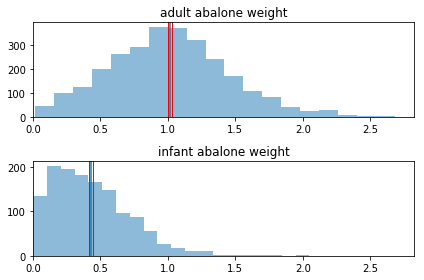

In [18]:
def plot_hist(x, xmin, xmax, p=5, nbins=20, title='title', sampling_dist=False):
    # Plot the distribution and mark the mean
    plt.hist(x, bins=nbins, alpha=.5)
    x_mean = x.mean() 
    plt.axvline(x_mean)
    print('Point estimate of the mean = %6.2f' %x_mean)
    if sampling_dist == False: #95% confidence interval on raw data
        upper_ci = x_mean + (1.96*x.sem())
        lower_ci = x_mean - (1.96*x.sem())
    elif sampling_dist == True: #95% confidence interval on sampling distributions (ie mean or difference in means)
        upper_ci = np.percentile(x, 100-p/2.)
        lower_ci = np.percentile(x, p/2.)
    plt.axvline(upper_ci, color='red', linewidth=1)
    plt.axvline(lower_ci, color='red', linewidth=1)
    print('The lower and upper confidence intervals = %6.3f %6.3f \n' %(lower_ci,upper_ci))
    plt.xlim( xmin, xmax )
    plt.title(title)
 
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5, sampling_dist=False):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    xmin = combined.min()
    xmax = combined.max()
    breaks = np.linspace(
        xmin, xmax, 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a, xmin, xmax, sampling_dist=False)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b, xmin = xmin, xmax = xmax, sampling_dist=False)
    plt.title(b_label)
    
    plt.tight_layout()
    

plot_dists(adult_slice.Whole_weight, infant_slice.Whole_weight, 20, a_label='adult abalone weight', b_label='infant abalone weight')

**No surprise here, adult abalone are have greater mean whole weight. Important to note that infant abalone weight is NOT normally distributed**

Point estimate of the mean =   1.05
The lower and upper confidence intervals =  1.023  1.070 

Point estimate of the mean =   0.99
The lower and upper confidence intervals =  0.968  1.015 



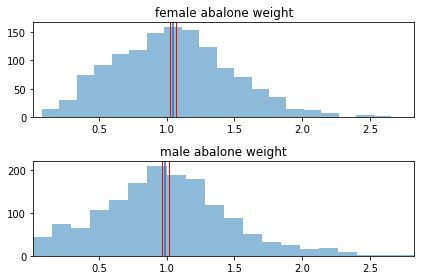

In [19]:
plot_dists(female_df.Whole_weight, male_df.Whole_weight, 20, a_label='female abalone weight', b_label='male abalone weight')

**95% confidence interval for male and female abalone also shows significant difference, although much closer this time. We benefit from our large sample sizes. n=~1200**

Point estimate of the mean =   0.05
The lower and upper confidence intervals =  0.022  0.088 



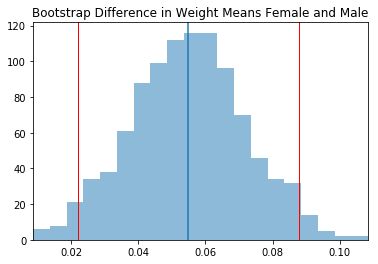

In [20]:
diffs = []
n_replicas=1000
for i in range(n_replicas):
    sample = abalone.sample(frac=1.0, replace=True)
    female_sample_mean = sample[sample.Sex == 'F'].Whole_weight.mean()
    male_sample_mean = sample[sample.Sex == 'M'].Whole_weight.mean()
    diffs.append(female_sample_mean - male_sample_mean)
diffs = pd.Series(diffs)

plot_hist(diffs, diffs.min(), diffs.max(), title='Bootstrap Difference in Weight Means Female and Male', sampling_dist=True)

**1000 replicas of boostrapped difference in weight means between male and female abalone show there is a significant difference at alpha=0.05.**

Point estimate of the mean =   0.06
The lower and upper confidence intervals =  0.018  0.105 



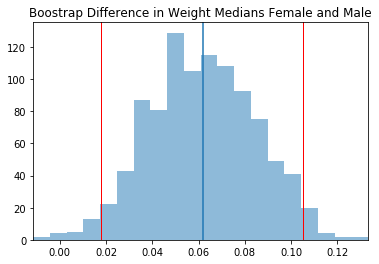

In [21]:
median_diffs = []
for i in range(n_replicas):
    sample = abalone.sample(frac=1.0, replace=True)
    female_sample_median = sample[sample.Sex == 'F'].Whole_weight.median()
    male_sample_median = sample[sample.Sex == 'M'].Whole_weight.median()
    median_diffs.append(female_sample_median - male_sample_median)
median_diffs = pd.Series(median_diffs)

plot_hist(median_diffs, median_diffs.min(), median_diffs.max(), title='Boostrap Difference in Weight Medians Female and Male', sampling_dist=True)

**1000 replicas of boostrapped difference in weight medians between male and female abalone show there is a significant difference at alpha=0.05.**

Point estimate of the mean =   0.42
The lower and upper confidence intervals =  0.195  0.660 



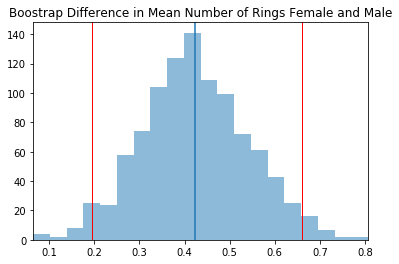

In [22]:
rings_diffs = []
for i in range(n_replicas):
    sample = abalone.sample(frac=1.0, replace=True)
    female_sample_median = sample[sample.Sex == 'F'].Rings.mean()
    male_sample_median = sample[sample.Sex == 'M'].Rings.mean()
    rings_diffs.append(female_sample_median - male_sample_median)
rings_diffs = pd.Series(rings_diffs)

plot_hist(rings_diffs, rings_diffs.min(), rings_diffs.max(), title='Boostrap Difference in Mean Number of Rings Female and Male', sampling_dist=True)

**We reject the null hypothesis that there is no difference in mean age between male and female abalone from our population. 1000 replicas of boostrapped difference in ring means (age) between male and female abalone show there is a significant difference at alpha=0.05.**

## Bayesian Summary Statistics

**Potential Prior Distributions: Uniform distribution, or a Normal distribution with mean and variance determined from the entire (un-grouped) population.**

Point estimate of the mean =   0.83
The lower and upper confidence intervals =  0.814  0.844 



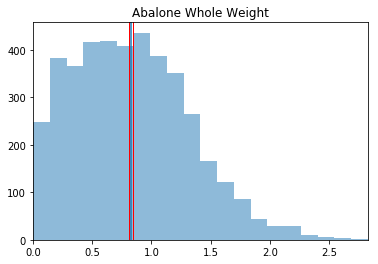

In [23]:
plot_hist(x=abalone.Whole_weight, xmin=abalone.Whole_weight.min(), xmax=abalone.Whole_weight.max(), p=5, nbins=20, title='Abalone Whole Weight', sampling_dist=False)

**Whole weight is not normally distributed**

Point estimate of the mean =  -0.44
The lower and upper confidence intervals = -0.466 -0.415 



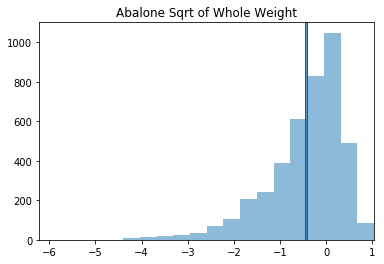

In [24]:
sqrt_weight = abalone.Whole_weight.apply(np.sqrt)
sqrt_female = female_df.Whole_weight.apply(np.sqrt)
sqrt_male = female_df.Whole_weight.apply(np.sqrt)
log_weight = abalone.Whole_weight.apply(np.log)

plot_hist(x=log_weight, xmin=log_weight.min(), xmax=log_weight.max(), p=5, nbins=20, title='Abalone Sqrt of Whole Weight', sampling_dist=False)

Point estimate of the mean =   0.86
The lower and upper confidence intervals =  0.854  0.872 



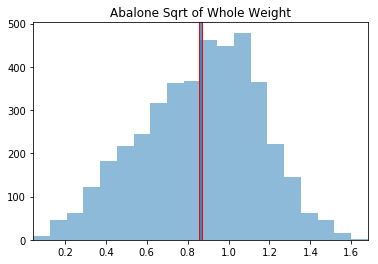

In [25]:
plot_hist(x=sqrt_weight, xmin=sqrt_weight.min(), xmax=sqrt_weight.max(), p=5, nbins=20, title='Abalone Sqrt of Whole Weight', sampling_dist=False)

**Square root of whole weight looks closer to normal, especially if we are not being "fussy".**

In [26]:
abalone.Whole_weight.describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Whole_weight, dtype: float64

**Classical summary statistics for whole weight.**

Mean of heights: 1.0


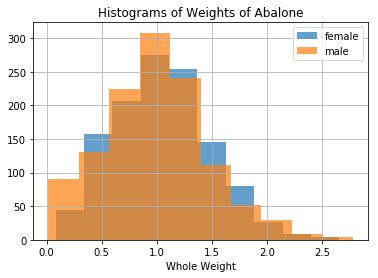

In [27]:
num_samples = 1200
female = abalone[abalone.Sex == 'F'].sample(n=num_samples)
male = abalone[abalone.Sex == 'M'].sample(n=num_samples)

plt.title('Histograms of Weights of Abalone')
female.Whole_weight.hist(label='female', bins=10, alpha=.7)
male.Whole_weight.hist(label='male', bins=10, alpha=.7)
plt.xlabel('Whole Weight')
plt.legend()

mean_weight = np.concatenate([female.Whole_weight, male.Whole_weight]).mean()
print('Mean of heights: %.1f' % mean_weight)

**Stacked histograms of male and female whole weight look quite similar.**

Mean = 1.048, Standard deviation = 0.434


Text(0.5, 1.0, 'Prior, Like, and Posterior Distribution for Mean of Female Weights w/ Fixed SD Estimate')

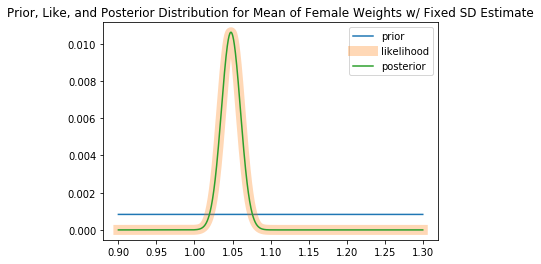

In [28]:
import scipy

# build uninformative prior distribution
N = 1200
p = np.linspace(.9, 1.3, num=N)

pp = scipy.stats.norm.pdf(p, loc=female.Whole_weight.mean(), scale=5) # center the normal distribution on mean weight of females
pp = pp / pp.sum() # normalize


def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_likelihood(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

likelihood_female = comp_likelihood(p, female.Whole_weight)
post_female = posterior(pp, likelihood_female)

plt.plot(p, pp, label='prior')
plt.plot(p, likelihood_female, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_female, label='posterior')
plt.legend()
plt.title('Prior, Like, and Posterior Distribution for Mean of Female Weights w/ Fixed SD Estimate')

Mean = 0.992, Standard deviation = 0.470


Text(0.5, 1.0, 'Prior, Like, and Posterior Distribution for Mean of Male Weights w/ Fixed SD Estimate')

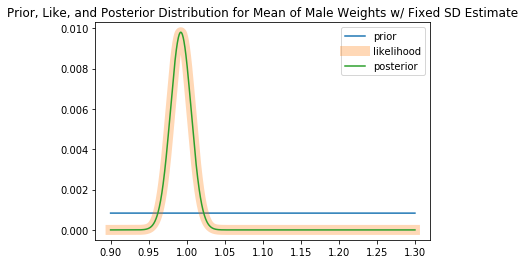

In [29]:
pp_male = scipy.stats.norm.pdf(p, loc=male.Whole_weight.mean(), scale=5)
pp_male = pp_male / pp_male.sum() # normalize

likelihood_male = comp_likelihood(p, male.Whole_weight)
post_male = posterior(pp_male, likelihood_male)

plt.plot(p, pp_male, label='prior')
plt.plot(p, likelihood_male, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_male, label='posterior')
plt.legend()
plt.title('Prior, Like, and Posterior Distribution for Mean of Male Weights w/ Fixed SD Estimate')

**Using a uniform distribution with a range similar to the whole weight range of the entire population gives us these two posterior distributions for female mean whole weight and male mean whole weight. Eyeballing it, they appear slightly offset.**

The 0.950 credible interval is 1.024 to 1.070


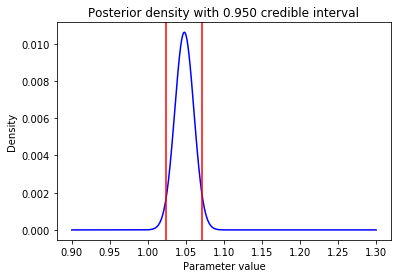

In [30]:
def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    plt.plot(p, post, color='blue')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')

    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))
    
plot_ci(p, post_female, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.968 to 1.019


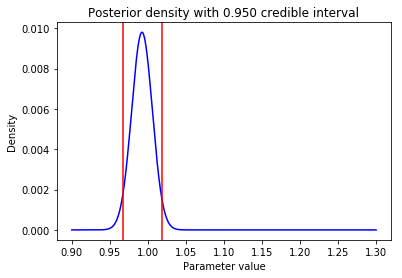

In [31]:
plot_ci(p, post_male, num_samples, lower_q=.025, upper_q=.975)

**The credible interval for female mean whole weight is 1.022 to 1.069. This does not overlap with the credible interval for male mean whole weight of 0.964 to 1.018. This reinforces the rejection with bootsrap methods of the null hypothesis (the means are equal).**

## t-test of male and female abalone whole weights

In [32]:
import statsmodels.stats.weightstats as ws
from statistics import mean

def t_test(a, b, alpha, alternative='two-sided', usevar = 'unequal'):
    '''Function to compute a two sample t-test on means'''
    
    ## Compute the difference in means for reporting.
    diff = a.mean() - b.mean()

    ## Compute the t-test
    t, p, df = ws.ttest_ind(a, b, usevar=usevar)
    
    ## Find the confidence interval
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar=usevar) 

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([df, diff, t, p, confint[0], confint[1]], index = index)  
   

test1 = t_test(female_df.Whole_weight, male_df.Whole_weight, 0.05)
test1

DegFreedom    2820.385451
Difference       0.055073
Statistic        3.253089
PValue           0.001155
Low95CI          0.021878
High95CI         0.088268
dtype: float64

**When we run a Welch's t-test on the whole weights of female and male abalone we get a p=0.001, we can reject the null hypothesis that mean male and female weights are the same. The reinforces our conclussion from bootstrap and bayes summary statistics.**

In [33]:
test2 = t_test(female_df.Rings, male_df.Rings, 0.05)
test2

DegFreedom    2742.434558
Difference       0.423806
Statistic        3.665660
PValue           0.000251
Low95CI          0.197105
High95CI         0.650508
dtype: float64

**A Welch's t-test on the number of Rings of female and male abalone also leads us to reject the null hypothesis that male and female abalone have the same mean age (Rings)**

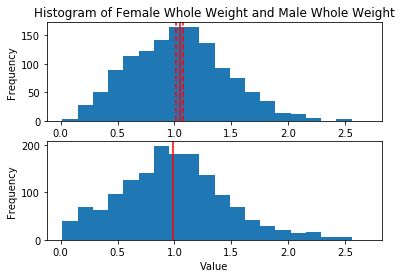

In [34]:
def hist_plot(vec, bins):
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def hist_mean_ci(vec, t_test, bins):
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(female_df.Whole_weight, male_df.Whole_weight, test1, ['Female Whole Weight','Male Whole Weight'])    

**Visualization of t-test on whole weights.**

## ANOVA

([<matplotlib.axis.XTick at 0x2b327c5ac18>,
 <a list of 2 Text xticklabel objects>)

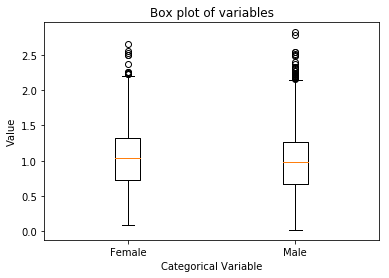

In [35]:
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plt.boxplot([female_df.Whole_weight, male_df.Whole_weight])
plt.ylabel('Value')
plt.xlabel('Categorical Variable')
plt.title('Box plot of variables')
plt.xticks([1, 2], ['Female', 'Male'])

In [36]:
# perform one way ANOVA
f_statistic, p_value = ss.f_oneway(female_df.Whole_weight, male_df.Whole_weight)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 10.436365086364129
P-value = 0.0012497207919556544


**F > 1, we reject the null hypothesis that male and female abalone have the same mean whole weight.**

## Distribution Analysis

In [37]:
import numpy.random as nr

nr.seed(1435)
# creat normal distribution of same size as abalone sample
norm = nr.normal(size = 4177).tolist()

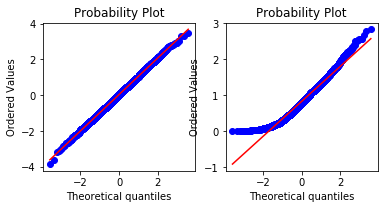

In [38]:
def qq_plot(vec1, vec2):
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax2 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax2) ## Plot the right subplot
    
qq_plot(norm, abalone.Whole_weight)    

**Distribution of abalone weight is not normal. Positively skewed.**

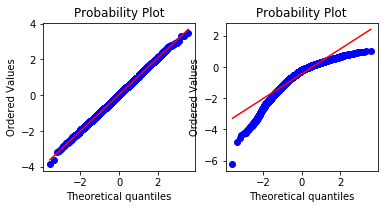

In [39]:
qq_plot(norm, log_weight)

**Distribution of log of abalone weight is even farther from normal.**

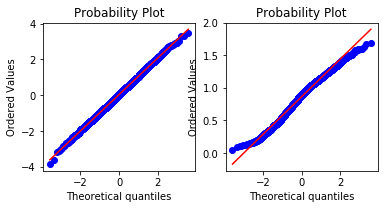

In [40]:
qq_plot(norm, sqrt_weight)

**Distribution of sqrt of abalone weight is closer to normal.**

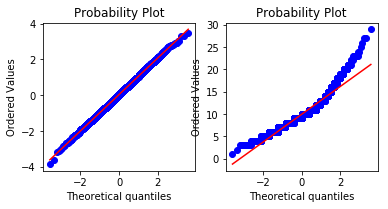

In [41]:
qq_plot(norm, abalone.Rings)

**Distribution of rings(age) is not normal.**

## Conclusions
---
- **Using bayesian, bootstrap and classical methods we reject the hypothesis that male and female abalone whole weight have equal means.**
- **Using bootstrap methods we reject the hypothesis that male and female rings (age) have equal means**
- **Abalone whole weight is not normally distributed, sqrt(whole weight) is closer to normal.**
- **Abalone rings is not normally distributed.** 

## <font color='red'>  MILESTONE 3 BEGINS HERE </font>
---
 - Use regression models to work towards original goal of determining what physical attributes or combination of physical attributes can be used to best predict abalone age/shell rings.

In [42]:
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot, plot_regress_exog

In [43]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [44]:
# one-hot encode categorical variables
abalone.loc[:, "Male"] = (abalone.loc[:, "Sex"] == "M").astype(int)
abalone.loc[:, "Female"] = (abalone.loc[:, "Sex"] == "F").astype(int)
abalone.loc[:, "Infant"] = (abalone.loc[:, "Sex"] == "I").astype(int)

In [45]:
# create adult abalone df for later
adult_abalone = abalone[abalone['Sex'] != 'I']
# drop redundant column
abalone = abalone.drop("Sex", axis=1)

In [46]:
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

# scale feature columns 
for col in ['Length','Diameter','Height','Whole_weight','Shuck_weight','Vis_weight', 'Shell_weight', 'Male',
           'Female', 'Infant']:
    abalone.loc[:,col] = scale(abalone.loc[:,col])

**Prepared, cleaned, and normalized data below:**

In [47]:
abalone.head()

,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings,Male,Female,Infant
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15,1.316677,-0.674834,-0.688018
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7,1.316677,-0.674834,-0.688018
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9,-0.759488,1.481846,-0.688018
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10,1.316677,-0.674834,-0.688018
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7,-0.759488,-0.674834,1.453451


In [48]:
# build crude linear model using all features indiscriminately
ols_model_crude = sm.ols(formula = 'Rings ~ Length + Diameter + Height + Whole_weight + Shuck_weight + Vis_weight + Shell_weight + Male + Female + Infant',
                     data=abalone).fit()

In [49]:
results1 = abalone.copy()
results1['predicted'] = ols_model_crude.predict(abalone[['Length','Diameter','Height','Whole_weight','Shuck_weight',
                                                     'Vis_weight','Shell_weight','Male','Female','Infant']])


In [50]:
results1.head()

,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings,Male,Female,Infant,predicted
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15,1.316677,-0.674834,-0.688018,9.222306
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7,1.316677,-0.674834,-0.688018,7.849257
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9,-0.759488,1.481846,-0.688018,11.095570
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10,1.316677,-0.674834,-0.688018,9.654205
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7,-0.759488,-0.674834,1.453451,6.735447


In [51]:
ols_model_crude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Thu, 12 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:54:15   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.9337      0.034    292.604      0.000       9.867      10.000
Length          -0.0550      0.217     -0.253      0.800      -0.481       0.371
Diameter         1.0990      0.221      4.972      0.000       0.666       1.532
Height           0.4501      0.064      7.005      0.000       0.324       0.576
Whole_weight     4.4009      0.356     12.373      0.000       3.704       5.098
Shuck_weight    -4.3914      0.181    -24.209      0.000      -4.747      -4.036
Vis_weight      -1.1598      0.142     -8.179      0.000      -1.438      -0.882
Shell_weight     1.2167      0.157      7.772      0.000       0.910       1.524
Male             0.1484      0.023      6.412      0.000       0.103       0.194
Female           0.1161      0.025      4.634      0.000       0.067       0.165
Infant          -0.2683      0.028     -9.518      0.000      -0.324      -0.213
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                     7.83e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Our first crude model using all features is expectedly lackluster. The Akaike information criterion seems large at first glance. Adjusted R2 = 0.537. Stats models gives us a warning about multicollinearity, which also makes sense. Based on common sense, different weight features may be colinear as well as different shell measurement features. The next step will be to use stepwise regression to select features more sparingly**

### Stepwise Regression

In [52]:
# stepwise regression libraries
import scipy.stats as ss
import numpy.random as nr
import scipy.stats as ss

In [53]:
def forward_selected(data, response, verbose=True):
    """Linear model designed by forward selection. Based on AIC

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
    """
    # Start with no factors (intercept only)
    formula = "{} ~ 1".format(response)
    best_aic = sm.ols(formula, data).fit().aic
    
    # Go through remaining sets of variables one-by-one
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_aic = best_aic
    
    if(verbose):
                print('For formula ', formula, ' the AIC = ', current_aic)
    
    # Check if any variables remain and if we haven't improved by adding any yet
    while remaining and current_aic == best_aic:
        aic_candidates = []
        for candidate in remaining:
            # Try adding the candidate column
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            # Get AIC
            aic = sm.ols(formula, data).fit().aic
            # Append tuple of the form (aic, response)
            aic_candidates.append((aic, candidate))
            if(verbose):
                print('For formula ', formula, ' the AIC = ', aic)
        # Sort all the pairs by the first entry of tuple (default of sort() method)
        aic_candidates.sort()
        # Remember that the sort() method sorts by smallest to largest of first entry here.
        #   If you were to change the criteria to something that needs to be maximized, change sort/pop order!
        best_new_aic, best_candidate = aic_candidates.pop(0)
        # Now check if we have something better:
        if best_new_aic < current_aic:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_aic = best_new_aic
        # Now we repeat the process with all the remaining candidate columns

    # Here is the final formula!
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    # Get the model object
    model = sm.ols(formula, data).fit()
    
    if(verbose):
        print('\nThe selected model formula is ', model.model.formula)
        print('The final AIC =', model.aic)
        print('\nThe model summary is')
        print(model.summary())
    return model

ols_model_fsw = forward_selected(abalone, 'Rings')

For formula  Rings ~ 1  the AIC =  21634.63344665226
For formula  Rings ~ Length + 1  the AIC =  20087.08370290655
For formula  Rings ~ Vis_weight + 1  the AIC =  20413.578762791465
For formula  Rings ~ Infant + 1  the AIC =  20755.67175465974
For formula  Rings ~ Height + 1  the AIC =  20082.037660795977
For formula  Rings ~ Male + 1  the AIC =  21496.197381585676
For formula  Rings ~ Diameter + 1  the AIC =  19962.37990818996
For formula  Rings ~ Whole_weight + 1  the AIC =  20194.144712534693
For formula  Rings ~ Shuck_weight + 1  the AIC =  20822.231589022795
For formula  Rings ~ Female + 1  the AIC =  21366.43470866536
For formula  Rings ~ Shell_weight + 1  the AIC =  19545.516772497092

The selected model formula is  Rings ~ Shell_weight + 1
The final AIC = 19545.516772497092

The model summary is
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.394
Model:                     

**Forward selection yields models with lower R2 and higher AIC than the initial model with no feature selection. Not helpful.**

In [54]:
def backward_selected(data, response, verbose=True):
    """Linear model designed by backward selection. Based on AIC

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
    """
    # Start with all factors and intercept
    possible_factors = set(data.columns)
    possible_factors.remove(response)
    formula = "{} ~ {} + 1".format(response, ' + '.join(possible_factors))
    
    # Fill out this formula!
    #--------------------------------
    # Fill in spot #1!!!!
    best_aic = sm.ols(formula, data).fit().aic
    #--------------------------------
    
    current_aic = best_aic
    
    if(verbose):
                print('For formula ', formula, ' the AIC = ', current_aic)
    
    # Set a non-empty set of columns that will be labeled as "to remove and try"
    to_try_remove = possible_factors
    
    # Check if any variables remain and if we haven't improved by adding any yet
    while to_try_remove and current_aic == best_aic:
        aic_candidates = []
        for candidate in to_try_remove:
            
            columns = possible_factors - set([candidate])
            # Try removing the candidate column
            formula = "{} ~ {} + 1".format(response, ' + '.join(columns))
            # Get AIC
            aic = sm.ols(formula, data).fit().aic
            
            if(verbose):
                print('For formula ', formula, ' the AIC = ', aic)
            
            # Append tuple of the form (aic, response)
            aic_candidates.append((aic, candidate))
            
        # Sort all the pairs by the first entry of tuple (default of sort() method)
        aic_candidates.sort()
        # Remember that the sort() method sorts by smallest to largest of first entry here.
        #   If you were to change the criteria to something that needs to be maximized, change sort/pop order!
        best_new_aic, best_candidate = aic_candidates.pop(0)
        
        # Now check if we have something better:
        if best_new_aic < current_aic:
            # Remove the best candidate's name from possible_factors
            
            #--------------------------------
            # Fill in spot #2!!!!
            possible_factors.remove(best_candidate)
            current_aic = best_new_aic
            #--------------------------------
            
        # Now we repeat the process with all the remaining candidate columns

    # Here is the final formula!
    formula = "{} ~ {} + 1".format(response, ' + '.join(possible_factors))
    # Get the model object
    model = sm.ols(formula, data).fit()
    
    if(verbose):
        print('\nThe selected model formula is ', model.model.formula)
        print('The final AIC =', model.aic)
        print('\nThe model summary is')
        print(model.summary())
    return model

ols_model_bsw = backward_selected(abalone, 'Rings')

For formula  Rings ~ Length + Vis_weight + Infant + Height + Male + Diameter + Whole_weight + Shuck_weight + Female + Shell_weight + 1  the AIC =  18428.23919246111
For formula  Rings ~ Vis_weight + Infant + Height + Male + Diameter + Whole_weight + Shuck_weight + Female + Shell_weight + 1  the AIC =  18426.303530456193
For formula  Rings ~ Length + Infant + Height + Male + Diameter + Whole_weight + Shuck_weight + Female + Shell_weight + 1  the AIC =  18492.766390847963
For formula  Rings ~ Length + Vis_weight + Height + Male + Diameter + Whole_weight + Shuck_weight + Female + Shell_weight + 1  the AIC =  18428.23919246111
For formula  Rings ~ Length + Vis_weight + Infant + Male + Diameter + Whole_weight + Shuck_weight + Female + Shell_weight + 1  the AIC =  18475.143547785432
For formula  Rings ~ Length + Vis_weight + Infant + Height + Diameter + Whole_weight + Shuck_weight + Female + Shell_weight + 1  the AIC =  18428.23919246111
For formula  Rings ~ Length + Vis_weight + Infant + He

**Backward selection yields a model almost identical to the initial model but with "Length" cut from the model. However, the AIC appears identical to the initial model. We still have problems with multicollinearity.**

-----------
**At this point a biologist trying to estimate abalone Rings/Age might use some domain knowledge. Eliminating infant abalone from the dataset might improve our chances at a useful model by focusing only on adult organisms.**

In [57]:
adult_abalone = adult_abalone.drop(['Sex','Infant'], axis=1)
for col in ['Length','Diameter','Height','Whole_weight','Shuck_weight','Vis_weight', 'Shell_weight', 'Male',
           'Female']:
    adult_abalone.loc[:,col] = scale(adult_abalone.loc[:,col])

**New normalized data:**

In [58]:
adult_abalone.head()

,Length,Diameter,Height,Whole_weight,Shuck_weight,Vis_weight,Shell_weight,Rings,Male,Female
0,-1.195694,-1.032613,-1.588606,-1.109706,-1.011288,-1.193043,-1.096235,15,0.924860,-0.924860
1,-2.291684,-2.301064,-1.722242,-1.746378,-1.600478,-1.708444,-1.717294,7,0.924860,-0.924860
2,-0.412844,-0.334965,-0.519510,-0.749991,-0.860456,-0.795448,-0.630441,9,-1.081244,1.081244
3,-1.352264,-1.032613,-0.786784,-1.105292,-1.053710,-1.065420,-1.057419,10,0.924860,-0.924860
6,-0.412844,-0.398388,-0.118600,-0.528204,-0.952370,-0.795448,0.301148,20,-1.081244,1.081244


In [73]:
ols_model_a_simple = sm.ols(formula = 'Rings ~ Whole_weight',
                     data=adult_abalone).fit()

In [74]:
results_a = adult_abalone.copy()
results_a['predicted'] = ols_model_a_simple.predict(adult_abalone[['Whole_weight']])

ols_model_a_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     340.5
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           7.02e-72
Time:                        11:02:56   Log-Likelihood:                -7040.6
No. Observations:                2835   AIC:                         1.409e+04
Df Residuals:                    2833   BIC:                         1.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.9009      0.054    200.111      0.000      10.794      11.008
Whole_weight     1.0051      0.054     18.451      0.000       0.898       1.112
==============================================================================
Omnibus:                      800.825   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2089.698
Skew:                           1.513   Prob(JB):                         0.00
Kurtosis:                       5.921   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**A linear model with just one feature can provide some context. Note the R2 is lower and the AIC is higher than the initial linear model including all features. No multicollinearity warning. <font color='red'>(Red Model)</font>**

In [59]:
ols_model_adult = sm.ols(formula = 'Rings ~ Length + Diameter + Height + Whole_weight + Shuck_weight + Vis_weight + Shell_weight + Male + Female',
                     data=adult_abalone).fit()

results3 = abalone.copy()
results3['predicted'] = ols_model_adult.predict(abalone[['Length','Diameter','Height','Whole_weight','Shuck_weight','Vis_weight','Shell_weight','Male','Female']])


In [60]:
ols_model_adult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     232.6
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          1.16e-303
Time:                        10:54:16   Log-Likelihood:                -6484.4
No. Observations:                2835   AIC:                         1.299e+04
Df Residuals:                    2826   BIC:                         1.304e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.9009      0.045    243.182      0.000      10.813      10.989
Length          -0.3782      0.230     -1.646      0.100      -0.829       0.072
Diameter         0.7699      0.225      3.423      0.001       0.329       1.211
Height           0.2671      0.066      4.018      0.000       0.137       0.397
Whole_weight     4.3181      0.386     11.177      0.000       3.561       5.076
Shuck_weight    -4.2147      0.205    -20.589      0.000      -4.616      -3.813
Vis_weight      -0.9745      0.151     -6.436      0.000      -1.271      -0.678
Shell_weight     1.1732      0.170      6.891      0.000       0.839       1.507
Male             0.0010      0.023      0.043      0.966      -0.044       0.045
Female          -0.0010      0.023     -0.043      0.966      -0.045       0.044
==============================================================================
Omnibus:                      530.031   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.978
Skew:                           1.065   Prob(JB):                    9.73e-257
Kurtosis:                       5.332   Cond. No.                     2.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Building a linear model with just the adult data still gives a multicollinearity warning. Length, Male and Female features are not statistically significant**

In [61]:
ols_model_adult_selected = sm.ols(formula = 'Rings ~ Diameter + Height + Whole_weight + Shuck_weight + Vis_weight + Shell_weight',
                     data=adult_abalone).fit()

results4 = abalone.copy()
results4['predicted'] = ols_model_adult_selected.predict(abalone[['Diameter','Height','Whole_weight','Shuck_weight','Vis_weight','Shell_weight']])

In [62]:
ols_model_adult_selected.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          1.44e-305
Time:                        10:54:16   Log-Likelihood:                -6485.8
No. Observations:                2835   AIC:                         1.299e+04
Df Residuals:                    2828   BIC:                         1.303e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.9009      0.045    243.152      0.000      10.813      10.989
Diameter         0.4535      0.117      3.875      0.000       0.224       0.683
Height           0.2677      0.066      4.030      0.000       0.137       0.398
Whole_weight     4.3143      0.386     11.165      0.000       3.557       5.072
Shuck_weight    -4.2464      0.203    -20.889      0.000      -4.645      -3.848
Vis_weight      -1.0062      0.150     -6.702      0.000      -1.301      -0.712
Shell_weight     1.1790      0.170      6.926      0.000       0.845       1.513
==============================================================================
Omnibus:                      533.868   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1189.883
Skew:                           1.072   Prob(JB):                    4.17e-259
Kurtosis:                       5.341   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Eliminating the Male, Female and Length features yields a model with similar R2, similar AIC and importantly no super small eigenvalues. <font color='blue'>(Blue Model)</font>**

-------
**Considering the problems with small eigenvalues and the risk of overfitting, the next step is too experiment with SVD and regularization**

In [63]:
# compute an inverse of the model matrix and use this to estimate the model parameters
SVD_df = adult_abalone.copy()

X = SVD_df.loc[:,['Length','Diameter','Height','Whole_weight','Shuck_weight','Vis_weight','Shell_weight','Male','Female']]
U, s, V = np.linalg.svd(X, full_matrices=False)

print('\nThe singular values from the SVD are \n{}:'.format(s))


The singular values from the SVD are 
[1.31458340e+02 7.50239259e+01 3.49679397e+01 2.32040265e+01
 2.20372825e+01 1.64772965e+01 7.69333899e+00 5.25368921e+00
 1.16414367e-14]:


Text(0.5, 0, 'Singular value number')

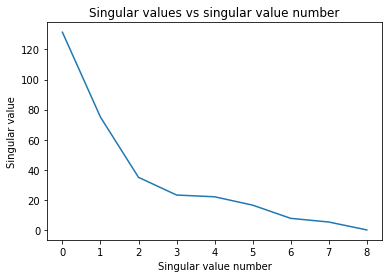

In [64]:
plt.plot(s)
plt.title('Singular values vs singular value number')
plt.ylabel('Singular value')
plt.xlabel('Singular value number')

In [65]:
def set_D(s, cutoff=0.18):
    '''Function creates inverse singular value matrix for 
    singular values greater than cutoff * largest singular value.'''
    d = []
    for sv in s:
        if(sv > cutoff * s[0]): d.append(1.0/sv)
        else: d.append(0.0)
    return np.diag(d)

D = set_D(s)
np.round(D,3)

array([[0.008, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.029, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

**With a cutoff of 0.01, 0 is substituted for one inverse of the singular value because the ratio of that singular value to the larges singular value falls below 0.01**

In [66]:
MP_inverse = np.dot(V, np.dot(D, np.transpose(U)))
b = np.dot(MP_inverse, SVD_df.Rings)
b

array([-4.98541980e-02, -8.76316424e-03,  7.77302855e-01,  3.06194699e-01,
       -8.60584426e-02, -3.88394197e-02, -2.43230335e-01, -4.48563153e-03,
       -3.44230439e-17])

In [67]:
SVD_df.loc[:,'predicted'] = np.dot(X, b)
Rings_scale = np.std(SVD_df.Rings)
Rings_mean = np.mean(SVD_df.Rings)
print('The mean actual Rings = {}   STD = {}\n'.format(Rings_mean, Rings_scale))
SVD_df.loc[:,'predicted'] = np.multiply(Rings_scale, SVD_df.loc[:,'predicted'])
SVD_df.loc[:,'predicted'] = np.add(Rings_mean,  SVD_df.loc[:,'predicted'])
SVD_df.loc[:10,['Rings','predicted']]

The mean actual Rings = 10.900881834215168   STD = 3.068710372347416



,Rings,predicted
0,15,7.494312
1,7,7.459686
2,9,9.836634
3,10,9.402030
6,20,10.331967
7,16,9.016373
8,9,9.273520
9,19,10.484470
10,14,10.101619


Mean of predicted values = 10.900881834215191
STD of predicted values = 2.163390222327955



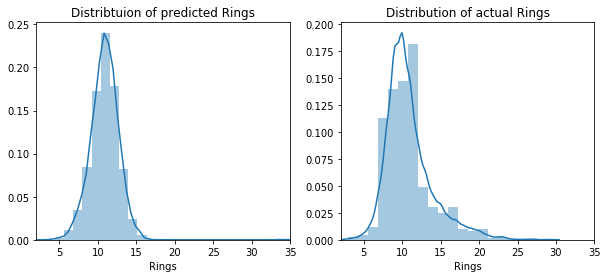

In [68]:
xmin = min(min(SVD_df.predicted), min(SVD_df.Rings))
xmax = max(max(SVD_df.predicted), max(SVD_df.Rings))
print('Mean of predicted values = {}'.format(np.mean(SVD_df.predicted)))
print('STD of predicted values = {}\n'.format(np.std(SVD_df.predicted)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.distplot(SVD_df.predicted, bins=60, ax=ax[0])
ax[0].set_title('Distribtuion of predicted Rings')
ax[0].set_xlabel('Rings')
ax[0].set_xlim(xmin,35)
sns.distplot(SVD_df.Rings, bins=20, ax=ax[1])
ax[1].set_title('Distribution of actual Rings')
ax[1].set_xlabel('Rings')
_=ax[1].set_xlim(xmin,35)

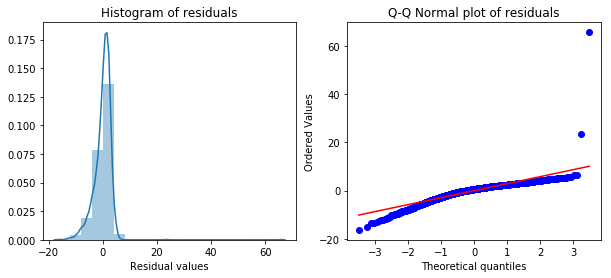

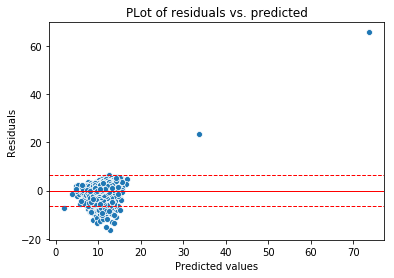

In [69]:
def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ## Plot a histogram
    sns.distplot(resids, bins=20, ax=ax[0])
    ax[0].set_title('Histogram of residuals')
    ax[0].set_xlabel('Residual values')
    ## Plot the Q-Q Normal plot
    ss.probplot(resids, plot = ax[1])
    ax[1].set_title('Q-Q Normal plot of residuals')
    plt.show()

def residual_plot(df):
    RMSE = np.std(df.resids)
    sns.scatterplot(x='predicted', y='resids', data=df)
    plt.axhline(0.0, color='red', linewidth=1.0)
    plt.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.title('PLot of residuals vs. predicted')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.show()  

SVD_df.loc[:,'resids'] = np.subtract(SVD_df.loc[:,'predicted'],SVD_df.loc[:,'Rings'])
plot_resid_dist(SVD_df.loc[:,'resids'])
residual_plot(SVD_df)

**SVD model residuals plotted above.**

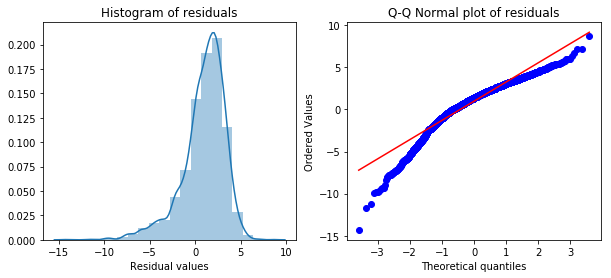

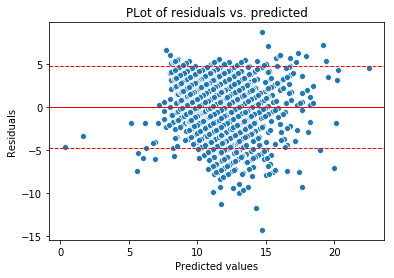

In [70]:
results4.loc[:,'resids'] = np.subtract(results4.loc[:,'predicted'],results4.loc[:,'Rings'])
plot_resid_dist(results4.loc[:,'resids'])
residual_plot(results4)

**Best feature-selected model residuals plotted above.**

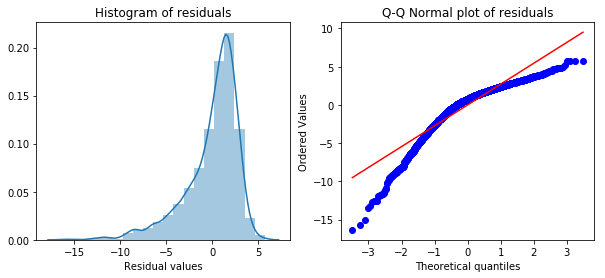

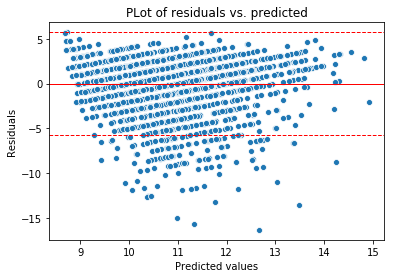

In [76]:
results_a.loc[:,'resids'] = np.subtract(results_a.loc[:,'predicted'],results_a.loc[:,'Rings'])
plot_resid_dist(results_a.loc[:,'resids'])
residual_plot(results_a)

**Simple single-feature (whole weight) linear model residuals plotted above.**